# Taller 6 - Filtro de Kalman 

Realización del proceso Gauss-Markov (Modelo de la señal)

$$s(n)=as(n-1)+ u(n)$$

Predicción del mínimo MSE

$$M_{n-1}(n)=a^{2}M_{n-1}(n-1)+ \sigma_{u}^{2}$$

Ganancia de kalman

$$k(n)=\frac{M_{n-1}(n)}{\sigma_{n}^{2}+M_{n-1}(n)}$$


##### Diagrama en bloque

<img src="KFbloques.png">

En el instante $n$ la estimación es:

$$ \hat{s}_{n}(n)=\hat{s}_{n-1}(n)+K(n)[x(n)-\hat{s}_{n-1}(n)] $$

$$ M_{n}(n)=(1-k(n))M_{n-1}(n) $$


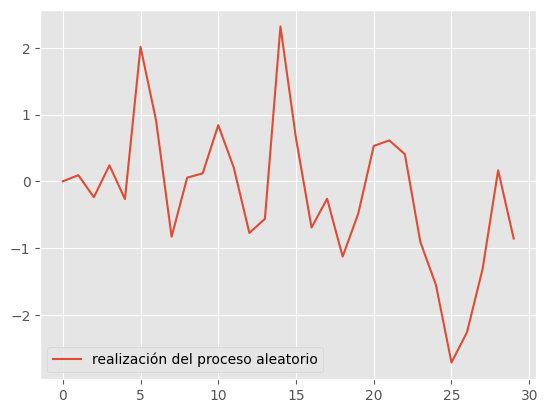

In [29]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

#Generar una realización del proceso aleatorio a partir del modelo de Gauss-Markov

N=30 #Tamaño de señal
a=0.5 #Constante del proceso

sigma_u=1 #varianza del proceso

#Inicializar la señal
s=np.zeros(N)
for n in np.arange(1,N):
    s[n]=a*s[n-1]+np.random.randn(1)*sigma_u #señal
    
plt.plot(s,label='realización del proceso aleatorio')
plt.legend()
plt.show()

### Generar señal con ruido a partir de la señal original 

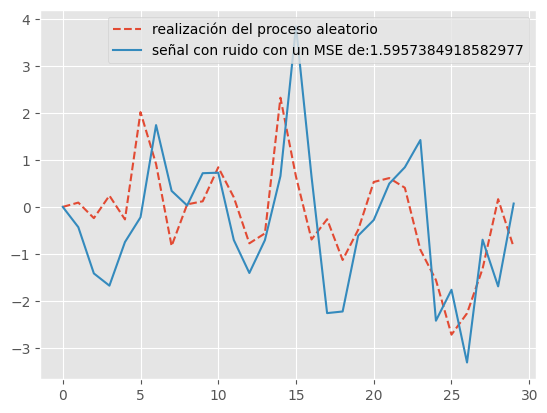

In [30]:
sigma_n = 1.2 #varianza del ruido
sr=np.zeros(N)
for n in np.arange(1,N):
    sr[n]=s[n-1]+np.random.randn(1)*sigma_n #señal
    
#Calcular el MSE
errorR=((sr-s)**2).mean()

plt.plot(s,'--',label='realización del proceso aleatorio')
plt.plot(sr,label='señal con ruido con un MSE de:'+str(errorR))
plt.legend()
plt.show()

###  Construir filtro de kalman

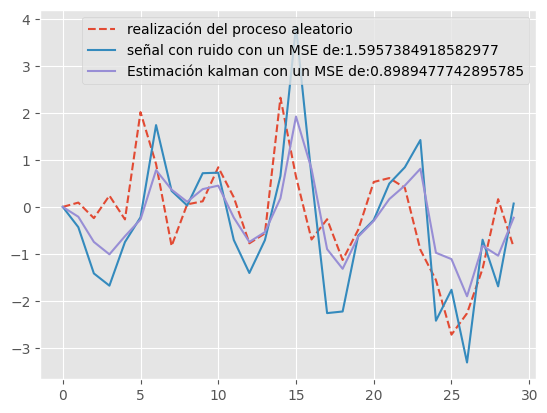

In [31]:
s_pred=0 #predicción anterior
M=0
s_hat=np.zeros(N)

for n in np.arange(N):
    #predicción
    s_pred=a*s_pred
    error=sr[n]-s_pred
    #Calcular prediccion del mínimo MSE
    M=a**2*M+sigma_u
    #Varianza del kalman
    K=M/(sigma_n+M)
    #calcular el estimador en base al error de la predicción
    s_pred=s_pred+K*error
    s_hat[n]=s_pred #guardamos señal filtrada para graficar
    #actualizar la predicción del mínimo MSE
    M=(1-K)*M


#Calcular el MSE de la estimación
errorK=((s_hat-s)**2).mean()


plt.plot(s,'--',label='realización del proceso aleatorio')
plt.plot(sr,label='señal con ruido con un MSE de:'+str(errorR))
plt.plot(s_hat,label='Estimación kalman con un MSE de:'+str(errorK))
plt.legend()
plt.show()